In [26]:
# This code is part of the Biopython distribution and governed by its
# license.  Please see the LICENSE file that should have been included
# as part of this package.

try:
    from numpy import corrcoef
    del corrcoef
except ImportError:
    from Bio import MissingExternalDependencyError
    raise MissingExternalDependencyError(
        "Install NumPy if you want to use Bio.SubsMat.")
try:
    import cPickle as pickle  # Only available on Python 2
except ImportError:
    import pickle

import numpy as np
import sys
import os
from Bio import SubsMat
from Bio.SubsMat import FreqTable, MatrixInfo
f = sys.stdout

## [URL]
[url](ftp://ftp.ncbi.nih.gov/repository/blocks/unix/blosum/BLOSUM/blosum62.out)

In [37]:
s = '''
Frequencies = fij pairs (off-diagonals = 2*fij):
    A      R      N      D      C      Q      E      G      H      I      L      K      M      F      P      S      T      W      Y      V  
 10682.82 
  3034.87   8494.79 
  2677.36   2210.31   5606.34 
  2891.15   2068.86   3892.52   8992.11 
  1689.11    566.42    652.05    546.53   5057.53 
  2441.71   2812.23   1757.19   1933.64    417.90   3191.29 
  3837.90   3269.54   2524.00   5358.06    639.98   3670.58   7875.47 
  6935.48   2265.08   3479.11   3148.02    962.77   1843.05   2507.44  17597.50 
  1351.17   1439.05   1674.77   1250.48    317.89   1162.52   1416.43   1222.49   3554.27 
  3906.94   1654.55   1404.28   1357.79    935.28   1252.95   1674.21   1952.28    725.87   7798.61 
  5354.86   3141.84   1917.64   2041.07   1544.93   2093.64   2875.89   2964.24   1440.65  11576.47  16939.58 
  3689.71   7089.26   2983.71   2950.49    661.72   3194.38   4844.61   3118.43   1506.60   1934.51   2953.51   7241.46 
  1774.76    980.91    724.98    607.40    412.85    910.78    927.94   1042.21    510.32   2503.11   4648.35   1077.46   1595.24 
  2240.63   1317.72   1025.84    928.86    675.63    780.32   1379.43   1638.17    999.38   3397.82   6462.76   1380.05   1374.17   8552.17 
  2492.00   1258.01   1201.10   1661.25    409.72   1193.88   2156.68   2086.22    655.00   1491.83   1931.79   2013.28    605.18    823.20   9501.33 
  6916.08   2838.82   3540.37   3138.24   1227.18   2473.26   3299.41   4890.12   1346.91   2316.44   3234.27   3424.75   1102.55   1762.50   2057.56   6193.92 
  4365.37   2312.40   2852.92   2500.45   1076.15   1668.51   2725.77   2770.49    950.88   3251.22   4278.60   2882.78   1268.59   1617.45   1804.51   5250.78   5543.30 
   541.81    430.02    250.35    240.98    106.37    381.15    472.38    569.39    179.24    511.16    878.02    407.96    283.58    990.14    262.28    356.34    406.23   3282.03 
  1703.39   1444.85   1003.84    967.47    448.60    967.06   1372.64   1287.71   1447.71   1974.89   3061.73   1442.13    835.20   4351.38    714.27   1444.93   1364.06    902.82   4307.45 
  6063.16   2202.29   1631.30   1790.49   1456.31   1570.86   2182.23   2400.08    824.82  11956.78  10215.18   2441.76   2387.67   3336.68   1730.34   3257.51   4526.65    536.28   1965.96   9111.27 
  '''

lines  = s.splitlines()
alist  = lines[2].split()
adict = { v:i for i,v in enumerate(alist)};
OUTPUT = {}
for i0,line in enumerate(lines[3:]):    
#     print list( ((i0,i1):float(v)) for i1,v in enumerate(line.split()))
    OUTPUT.update({(i0,i1):float(v) for i1,v in enumerate(line.split())})
import scipy.sparse
# import scipy
m0 = scipy.sparse.dok_matrix( 2*(len(alist), ), 'float')
m0.update(OUTPUT)
m0 = m0.todense()
dg =  np.diag(np.diag(m0))
m0 = (m0 + m0.T ) / 2

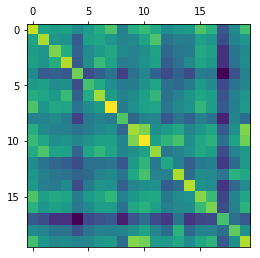

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fmat = m0
marfs = m0.sum(axis = 1)
# marps = marfs / sum(marfs)

pmat = fmat.copy() / sum(marfs)
# plt.matshow(fmat)
marps = pmat.sum(axis = 1).ravel()
# fmat
mat = scipy.log10(pmat)
plt.matshow(mat)

In [25]:
print mat2.max(),mat2.min()

1.67110057816 0.835429930246


In [24]:
lmarps + lmarps.T

matrix([[-1.11611462, -1.27367714, -1.36014459, -1.28909072, -1.65138275,
         -1.45688564, -1.24837228, -1.1316441 , -1.6071091 , -1.1933769 ,
         -1.01959908, -1.23750151, -1.61286117, -1.31787152, -1.38843104,
         -1.22563683, -1.27636617, -1.86307171, -1.47503694, -1.14005911]])

-1.1344491885 2.72264513084
0.970345888904 0.118400014533


array([ 1.2999157 ,  1.40215365,  1.3620397 ,  1.43868917,  1.61745009,
        1.29967071,  1.34986879,  1.50841061,  1.46423874,  1.28743742,
        1.34423611,  1.31225368,  1.26843599,  1.45314449,  1.57052362,
        1.25453435,  1.27500938,  1.67110058,  1.39702932,  1.27643484])

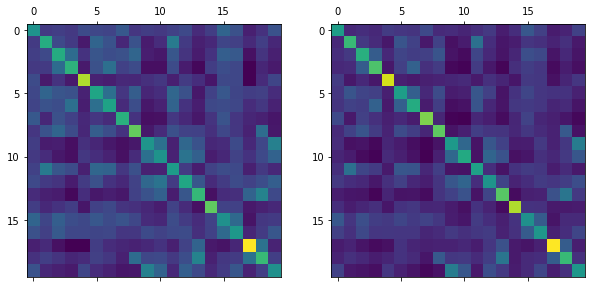

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
marps = pmat.sum(axis = 1).ravel()
lmarps = np.log10(marps)

npmat = pmat.copy() / marps.T /marps

mat1 = 10 * np.log10(npmat) 
mat2 =  (lmarps + lmarps.T) / np.log10(pmat.copy())
# mat2 = np.log10(pmat.copy())  0.5 * (lmarps + lmarps.T) 

print mat1.mean(),mat1.std()
print mat2.mean(),mat2.std()


fig = plt.figure(figsize = [10,10])
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.matshow(mat1)
ax2.matshow(mat2)
np.diag(mat2)

# mat2
# mat

In [40]:
print alist
mat1.astype('int')

['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


matrix([[ 5, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0, -2, -1,  1,  0,
         -3, -2,  0],
        [-1,  7,  0, -1, -3,  1,  0, -2,  0, -3, -2,  3, -1, -3, -2,  0, -1,
         -2, -1, -2],
        [-1,  0,  7,  1, -2,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  0,  0,
         -4, -2, -3],
        [-1, -1,  1,  7, -3,  0,  2, -1,  0, -4, -4,  0, -3, -4, -1,  0,  0,
         -5, -2, -3],
        [ 0, -3, -2, -3, 12, -3, -3, -2, -2, -2, -1, -3, -1, -2, -3,  0,  0,
         -5, -2,  0],
        [ 0,  1,  0,  0, -3,  6,  2, -1,  0, -2, -2,  1,  0, -3, -1,  0,  0,
         -1, -1, -2],
        [ 0,  0,  0,  2, -3,  2,  6, -2,  0, -3, -3,  1, -2, -3,  0,  0,  0,
         -2, -1, -3],
        [ 0, -2,  0, -1, -2, -1, -2,  7, -2, -4, -4, -1, -2, -3, -2,  0, -1,
         -2, -3, -3],
        [-1,  0,  1,  0, -2,  0,  0, -2, 10, -3, -2,  0, -1, -1, -2,  0, -1,
         -3,  1, -3],
        [-1, -3, -3, -4, -2, -2, -3, -4, -3,  5,  2, -3,  1,  0, -2, -2,  0,
         -2,  0,  3],
        [-

In [107]:
marps.flat

In [19]:
?anim.to_html5_video

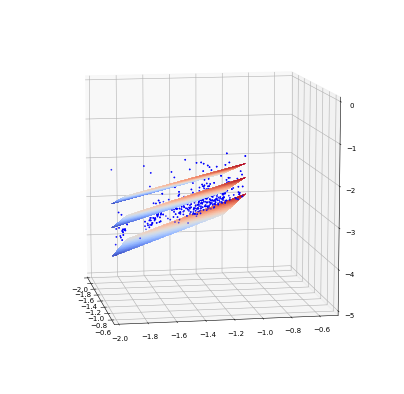

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

lmarps = np.log10(marps)
xs,ys = np.meshgrid( lmarps, lmarps)
zs = np.log10(pmat)

xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
X = np.linspace(xs.min(), xs.max(),30)
Y = np.linspace(ys.min(), ys.max(),30)
# Z = np.linspace(zss.min(), zss.max(),30)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + Y) / 1 


siz = [500,500]
DPI = 50

fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111, projection='3d')



from matplotlib import animation, rc
import IPython.display as ipd 

def init():
    pts = ax1.scatter(xs,ys,zs, s =2, color = 'blue')
#     ax1.set_xlim([-.5,-2])
#     ax1.set_ylim([-.5,-2])
#     ax1.set_zlim([0,-5])
    ax1.set_xlim([-2,-.5])
    ax1.set_ylim([-2,-.5])
    ax1.set_zlim([-5,0])

    #     pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
                       linewidth=0, antialiased=False)
    surf = ax1.plot_surface(X, Y, (X + Y)/1.2, cmap=cm.coolwarm, alpha = 0.5, 
                       linewidth=0, antialiased=False)
    surf = ax1.plot_surface(X, Y, (X + Y)*1.2, cmap=cm.coolwarm, alpha = 0.5, 
                       linewidth=0, antialiased=False)
    i = -4
    ax1.view_init(elev=30., azim=i*10)
    return (fig,ax1)


def animate(i,fig):
    ax1.view_init(elev= 10., azim=i*10)
    return (fig,)
init()
# def animate( i, ax1):
# #     line.set_data(data[...,:num])
#     ax1.view_init(elev=10., azim=i*10)
#     return ax1
fig,ax1 = init()

anim = animation.FuncAnimation(fig, animate, 
                               fargs = (fig,),
                               frames=36, 
#                                interval=50,
                               blit=True
                              );
anim.save('anim1.mp4', fps=10,
          writer = 'avconv',codec='libx264')

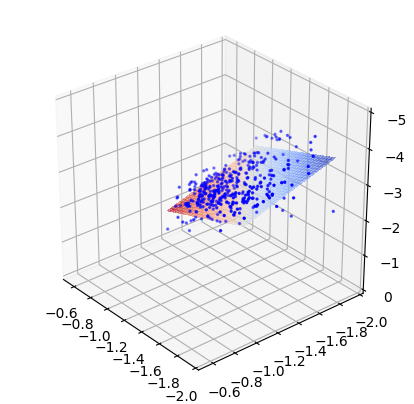

In [7]:
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111, projection='3d')

pts = ax1.scatter(xs,ys,zs, s =2, color = 'blue')
ax1.set_xlim([-.5,-2])
ax1.set_ylim([-.5,-2])
ax1.set_zlim([0,-5])

#     pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
                   linewidth=0, antialiased=False)
i = -4
ax1.view_init(elev=30., azim=i*10)

In [10]:
from util_anim import *
import util_anim
angles = np.linspace(0,360,121)[:-1] # Take 20 angles between 0 and 360
# create an animated gif (20ms between frames)
util_anim.rotanimate(ax1, angles,'movie.mp4',
#                      delay=10,
                     fps=10,bitrate=2000,) 


mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg,tmprot_020.jpeg,tmprot_021.jpeg,tmprot_022.jpeg,tmprot_023.jpeg,tmprot_024.jpeg,tmprot_025.jpeg,tmprot_026.jpeg,tmprot_027.jpeg,tmprot_028.jpeg,tmprot_029.jpeg,tmprot_030.jpeg,tmprot_031.jpeg,tmprot_032.jpeg,tmprot_033.jpeg,tmprot_034.jpeg,tmprot_035.jpeg,tmprot_036.jpeg,tmprot_037.jpeg,tmprot_038.jpeg,tmprot_039.jpeg,tmprot_040.jpeg,tmprot_041.jpeg,tmprot_042.jpeg,tmprot_043.jpeg,tmprot_044.jpeg,tmprot_045.jpeg,tmprot_046.jpeg,tmprot_047.jpeg,tmprot_048.jpeg,tmprot_049.jpeg,tmprot_050.jpeg,tmprot_051.jpeg,tmprot_052.jpeg,tmprot_053.jpeg,tmprot_054.jpeg,tmprot_055.jpeg,tmprot_056.jpeg,tmprot_057.jpeg,tmprot_058.jpeg,tmprot_059.jpeg,tmprot_060.jpeg,tmprot_06

In [26]:
fig,ax1 = init()
ax1.view_init(elev=10., azim=i*10)

In [29]:
ims = []
for i in np.arange(15):
    ims.append( 
        ax1.view_init(elev=10., azim=i*10)
    )
anim = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000,
    blit=True)
anim.save('anim.mp4', fps=20,
          writer = 'ffmpeg',codec='libx264')

TypeError: 'NoneType' object is not iterable

In [18]:
pts = ax1.scatter(xs,ys,zs, s =2, color = 'blue')
ax1.set_xlim([-.5,-2])
ax1.set_ylim([-.5,-2])
ax1.set_zlim([0,-5])


AttributeError: 'module' object has no attribute 'view'

In [ ]:
def update_line( i, ax1):
#     line.set_data(data[...,:num])
    ax1.view_init(elev=10., azim=i*10)
    return ax1

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
    interval=50, blit=True)

In [8]:
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=360, interval=10, blit=True
#                               );
anim.save('anim.mp4', 
#           fps=20,
          writer = 'ffmpeg',codec='libx264')

TypeError: 'Axes3DSubplot' object is not iterable

In [ ]:
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        ax1.view_init(elev=30., azim=i*10)
        writer.grab_frame()


In [36]:
import io
import base64

video = io.open('anim.mp4', 'r+b').read()
encoded = base64.b64encode(video)
ipd.HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

# mat1.shape
# for x,y,z in 
# ax.view(30,1)


# marfs

# print marps
# dir(acc_rep_mat)
# import numpy as np

# d = 
# d = 

In [2]:

ftab_file = os.path.join('SubsMat', 'protein_count.txt')
with open(ftab_file) as handle:
    ftab_prot = FreqTable.read_count(handle)
ctab_file = os.path.join('SubsMat', 'protein_freq.txt')
with open(ctab_file) as handle:
    ctab_prot = FreqTable.read_freq(handle)
f.write("Check differences between derived and true frequencies for each\n")
f.write("letter. Differences should be very small\n")
for i in ftab_prot.alphabet.letters:
    f.write("%s %f\n" % (i, abs(ftab_prot[i] - ctab_prot[i])))

Check differences between derived and true frequencies for each
letter. Differences should be very small
A 0.000009
C 0.000001
D 0.000006
E 0.000006
F 0.000004
G 0.000008
H 0.000002
I 0.000006
K 0.000006
L 0.000009
M 0.000002
N 0.000005
P 0.000005
Q 0.000004
R 0.000005
S 0.000006
T 0.000006
V 0.000008
W 0.000002
Y 0.000004


In [5]:
pickle_file = os.path.join('SubsMat', 'acc_rep_mat.pik')
# Don't want to use text mode on Python 3,
with open(pickle_file, 'rb') as handle:
    acc_rep_mat = pickle.load(handle)
    
acc_rep_mat = SubsMat.AcceptedReplacementsMatrix(acc_rep_mat)
obs_freq_mat = SubsMat._build_obs_freq_mat(acc_rep_mat)
ftab_prot2 = SubsMat._exp_freq_table_from_obs_freq(obs_freq_mat)
obs_freq_mat.print_mat(f=f, format=" %4.3f")


f.write("Diff between supplied and matrix-derived frequencies, should be small\n")
for i in sorted(ftab_prot):
    f.write("%s %.2f\n" % (i, abs(ftab_prot[i] - ftab_prot2[i])))

A 0.011
C 0.002 0.002
D 0.009 0.001 0.008
E 0.010 0.001 0.008 0.006
F 0.006 0.002 0.003 0.003 0.004
G 0.011 0.002 0.007 0.007 0.005 0.016
H 0.003 0.001 0.003 0.002 0.002 0.003 0.003
I 0.010 0.002 0.003 0.003 0.008 0.005 0.002 0.007
K 0.010 0.001 0.008 0.008 0.003 0.007 0.003 0.004 0.006
L 0.015 0.003 0.006 0.007 0.012 0.008 0.004 0.017 0.006 0.016
M 0.004 0.001 0.001 0.002 0.003 0.002 0.001 0.004 0.002 0.008 0.001
N 0.007 0.001 0.008 0.006 0.003 0.007 0.003 0.003 0.007 0.005 0.002 0.003
P 0.006 0.001 0.005 0.005 0.003 0.005 0.001 0.003 0.005 0.004 0.001 0.005 0.006
Q 0.006 0.001 0.006 0.005 0.002 0.004 0.002 0.003 0.005 0.004 0.001 0.004 0.003 0.002
R 0.008 0.001 0.006 0.006 0.003 0.004 0.002 0.003 0.008 0.005 0.002 0.005 0.004 0.004 0.005
S 0.010 0.001 0.008 0.007 0.005 0.008 0.003 0.004 0.007 0.008 0.002 0.006 0.005 0.005 0.005 0.006
T 0.010 0.002 0.006 0.008 0.003 0.008 0.003 0.004 0.007 0.009 0.002 0.005 0.005 0.005 0.006 0.009 0.004
V 0.013 0.003 0.005 0.006 0.008 0.007 0.003 0.01

In [27]:
2*(1,)

(1, 1)

In [28]:
pickle_file = os.path.join('SubsMat', 'acc_rep_mat.pik')
# Don't want to use text mode on Python 3,
with open(pickle_file, 'rb') as handle:
    acc_rep_mat = pickle.load(handle)    
acc_rep_mat = SubsMat.AcceptedReplacementsMatrix(acc_rep_mat)
obs_freq_mat = SubsMat._build_obs_freq_mat(acc_rep_mat)


m0 = obs_freq_mat
from scipy.sparse import *
# (len(acc_rep_mat)*2)**0.5

alist = m0.__dict__['ab_list']
adict = { v:i for i,v in enumerate(alist)};

d = dok_matrix( 2*(len(alist),),dtype = 'float')
d.update({tuple(adict[v] for v in k):vo for k,vo in m0.iteritems()})
d = d.todense()


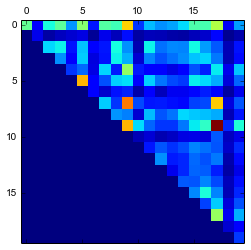

In [32]:
# d.update()
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure()
plt.matshow(d)
# dir(acc_rep_mat)
# SubsMat.Alphabet()

In [24]:
s = 0.
f.write("Calculating sum of letters for an observed frequency matrix\n")
counts = obs_freq_mat.sum()

Calculating sum of letters for an observed frequency matrix


0.9999999999999998

In [21]:
for key in sorted(counts):
    f.write("%s\t%.2f\n" % (key, counts[key]))
    s += counts[key]
f.write("Total sum %.2f should be 1.0\n" % (s))
lo_mat_prot = \
SubsMat.make_log_odds_matrix(acc_rep_mat=acc_rep_mat, round_digit=1)  # ,ftab_prot
f.write("\nLog odds matrix\n")
f.write("\nLog odds half matrix\n")
# Was %.1f. Let us see if this is OK
lo_mat_prot.print_mat(f=f, format=" %d", alphabet='AVILMCFWYHSTNQKRDEGP')

Calculating sum of letters for an observed frequency matrix
A	0.09
C	0.02
D	0.06
E	0.05
F	0.04
G	0.07
H	0.02
I	0.06
K	0.06
L	0.09
M	0.02
N	0.05
P	0.04
Q	0.04
R	0.04
S	0.06
T	0.06
V	0.08
W	0.02
Y	0.04
Total sum 1.00 should be 1.0

Log odds matrix

Log odds half matrix
A 0
V 0 1
I 0 0 1
L 0 0 0 0
M 0 0 0 0 1
C 0 0 0 0 0 3
F 0 0 0 0 0 0 1
W 0 0 0 0 0 0 0 2
Y 0 0 0 0 0 0 0 0 1
H 0 0 0 0 0 0 0 0 0 2
S 0 0 0 0 0 0 0 0 0 0 0
T 0 0 0 0 0 0 0 0 0 0 0 0
N 0 0 0 0 0 0 0 0 0 0 0 0 0
Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0
K 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
R 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
D 0 0 -1 0 -1 -1 0 0 0 0 0 0 0 0 0 0 1
E 0 0 -1 0 0 0 -1 0 0 0 0 0 0 0 0 0 0 1
G 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
P 0 0 0 -1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   A   V   I   L   M   C   F   W   Y   H   S   T   N   Q   K   R   D   E   G   P


In [ ]:
s = 0.
f.write("Calculating sum of letters for an observed frequency matrix\n")
counts = obs_freq_mat.sum()
for key in sorted(counts):
    f.write("%s\t%.2f\n" % (key, counts[key]))
    s += counts[key]
f.write("Total sum %.2f should be 1.0\n" % (s))
lo_mat_prot = \
SubsMat.make_log_odds_matrix(acc_rep_mat=acc_rep_mat, round_digit=1)  # ,ftab_prot
f.write("\nLog odds matrix\n")
f.write("\nLog odds half matrix\n")
# Was %.1f. Let us see if this is OK
lo_mat_prot.print_mat(f=f, format=" %d", alphabet='AVILMCFWYHSTNQKRDEGP')
f.write("\nLog odds full matrix\n")
# Was %.1f. Let us see if this is OK
lo_mat_prot.print_full_mat(f=f, format=" %d", alphabet='AVILMCFWYHSTNQKRDEGP')

f.write("\nTesting MatrixInfo\n")
for i in MatrixInfo.available_matrices:
    mat = SubsMat.SeqMat(getattr(MatrixInfo, i))
    f.write("\n%s\n------------\n" % i)
    mat.print_mat(f=f)
f.write("\nTesting Entropy\n")
relative_entropy = lo_mat_prot.calculate_relative_entropy(obs_freq_mat)
f.write("relative entropy %.3f\n" % relative_entropy)

f.write("\nmatrix correlations\n")
blosum90 = SubsMat.SeqMat(MatrixInfo.blosum90)
blosum30 = SubsMat.SeqMat(MatrixInfo.blosum30)
f.write("BLOSUM30 & BLOSUM90 %.2f\n" % SubsMat.two_mat_correlation(blosum30, blosum90))
f.write("BLOSUM90 & BLOSUM30 %.2f\n" % SubsMat.two_mat_correlation(blosum90, blosum30))